Github Repo: 
https://github.com/adam080880/tb2-image-processing/blob/main/tb2.ipynb

Soal no 1
Kerjakan pengolahan citra gambar dibawah ini menggunakan Convert Grayscale Image to Binary Image dan Object Boundary Search (Boundary tracing) serta dapat dihitung jumlahnya.

Jumlah objek terdeteksi: 29


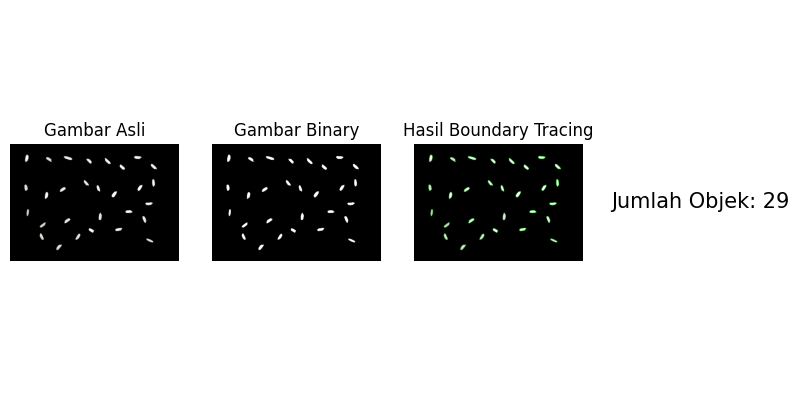

In [8]:
import cv2;
import matplotlib.pyplot as plt

# 1. Baca gambar dan ubah ke grayscale
img = cv2.imread('no2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Konversi ke binary image (thresholding)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 3. Boundary tracing (menggunakan contour detection OpenCV)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 4. Gambar batas objek
output = img.copy()
cv2.drawContours(output, contours, -1, (0, 255, 0), 1)

# 5. Hitung dan tampilkan jumlah objek
jumlah_objek = len(contours)
print(f"Jumlah objek terdeteksi: {jumlah_objek}")

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title('Gambar Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 4, 2)
plt.title('Gambar Binary')
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.title('Hasil Boundary Tracing')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.text(0.5, 0.5, f'Jumlah Objek: {jumlah_objek}', 
         fontsize=15, ha='center', va='center')
plt.axis('off')
plt.show()

Soal no 2
Kerjakan pengolahan citra gambar dibawah ini menggunakan Object Boundary Search (Boundary tracing) serta dapat dihitung jumlahnya

Jumlah objek terdeteksi: 4


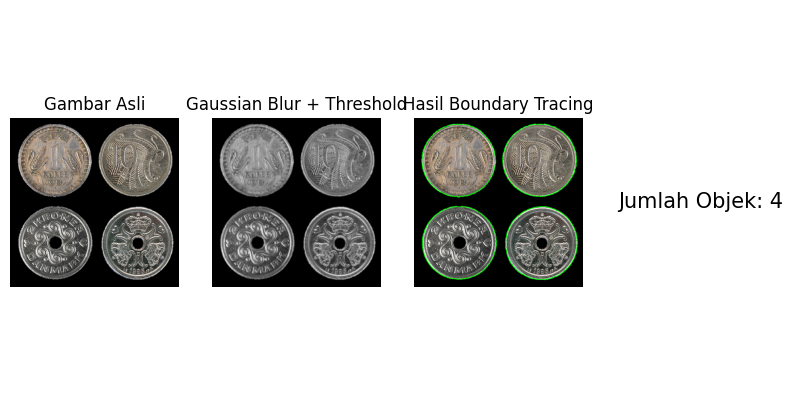

In [23]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar
# 1. Baca gambar dan ubah ke grayscale
img = cv2.imread('no4.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Blur untuk ilangin noise
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold biner (ubah ke hitam-putih)
_, binary = cv2.threshold(gray_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Temukan kontur (boundary tracing)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# 4. Gambar batas objek
output = img.copy()
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

# 5. Hitung dan tampilkan jumlah objek
jumlah_objek = len(contours)
print(f"Jumlah objek terdeteksi: {jumlah_objek}")

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title('Gambar Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Gaussian Blur + Threshold')
plt.imshow(cv2.cvtColor(gray_blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Hasil Boundary Tracing')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 4)
plt.text(0.5, 0.5, f'Jumlah Objek: {jumlah_objek}', 
         fontsize=15, ha='center', va='center')
plt.axis('off')
plt.show()

Soal no 3
Kerjakan pengolahan citra menggunakan teknik Sampling N=2^n  dan Kuantisasi K=2^m  pada citra sheep

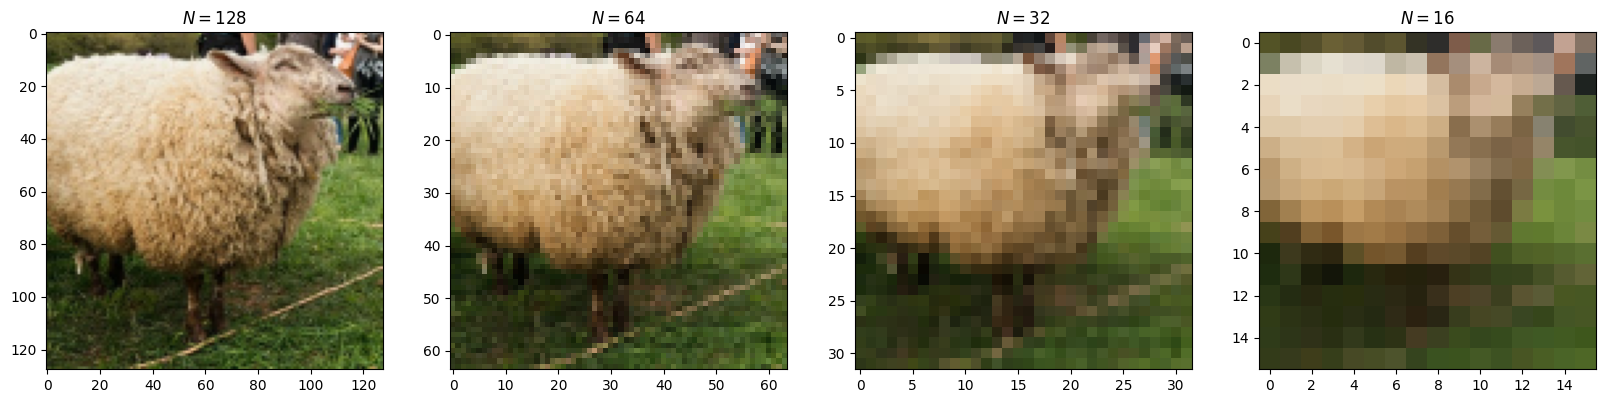

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread

# A. Untuk Sampling N=2^n
imageSample = imread('./Sheep.jpg')

from skimage.transform import downscale_local_mean

sampling_factor = 2

factors = sampling_factor**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))

for factor, ax in zip(factors, axis):
    image = downscale_local_mean(imageSample, 
                                 factors=(factor, factor, 1)).astype(int)
    ax.imshow(image)
    ax.set_title('$N={}$'.format(image.shape[0]))

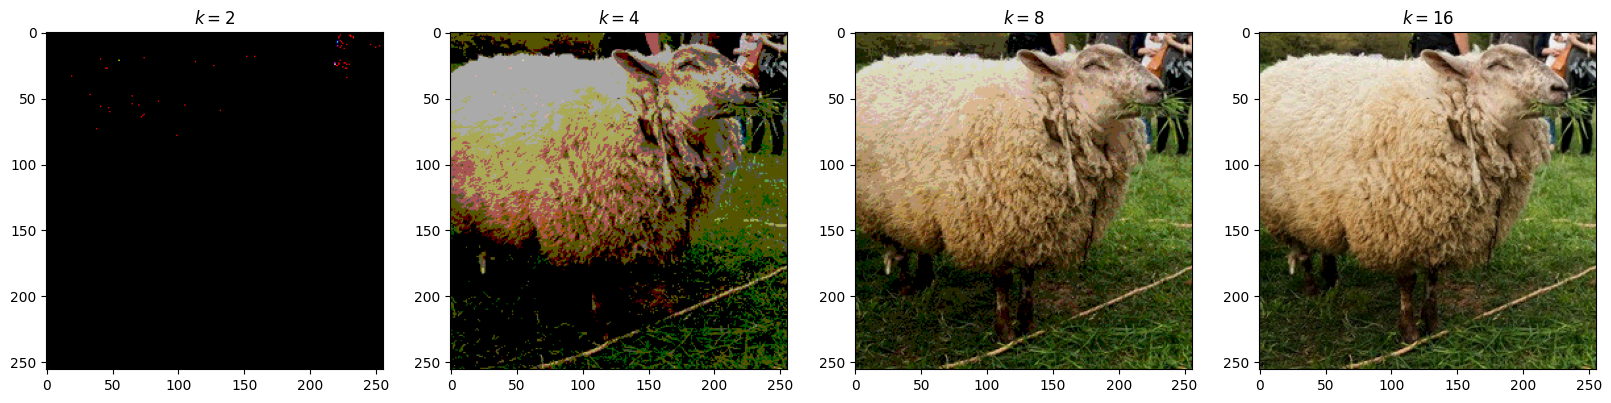

In [3]:
# B. Untuk Kuantiasasi K=2^m
kuantisasi_factor = 2

factors = kuantisasi_factor**np.arange(1, 5)

figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))

for k, ax in zip(factors, axis):
    bins = np.linspace(0, imageSample.max(), k)
    image = np.digitize(imageSample, bins)
    image = (np.vectorize(bins.tolist().__getitem__)
                         (image-1).astype(int))
    ax.imshow(image)
    ax.set_title('$k = {}$'.format(k))

Soal no 4
Kerjakan pengolahan citra menggunakan operasi aritmatika penambahan dua gambar   pada citra barbara dan bunga2

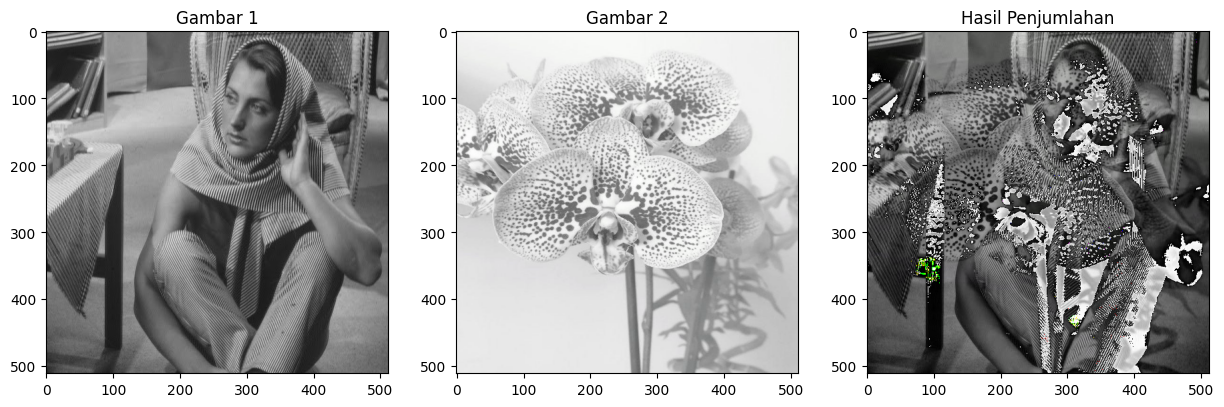

In [5]:
import cv2
import numpy as np
# Load two images
img1 = cv2.imread('./Barbara.jpg')
img2 = cv2.imread('./Bunga2.jpeg')

# get dimensi x, y dari img1
height, width = img1.shape[:2]
# Resize img2 ke ukuran img1
img2 = cv2.resize(img2, (width, height))
img_hasil = np.add(img1, img2)

img_hasil = np.clip(img_hasil, 0, 255).astype(np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].set_title('Gambar 1')
axs[0].imshow(img1, cmap='gray')

axs[1].set_title('Gambar 2')
axs[1].imshow(img2, cmap='gray')

axs[2].set_title('Hasil Penjumlahan')
axs[2].imshow(img_hasil, cmap='gray')

plt.show()